In [35]:
import pandas as pd


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df=pd.read_csv("/kaggle/input/foodreview/Reviews.csv")


In [38]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [39]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [40]:
# Make a backup of the original dataframe
df_backup = df.copy()

# List of columns to keep
columns_to_keep = ['Text', 'Score']

# Drop all other columns
df_selected = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

# Display the first few rows to verify
print(df_selected.head())

   Score                                               Text
0      5  I have bought several of the Vitality canned d...
1      1  Product arrived labeled as Jumbo Salted Peanut...
2      4  This is a confection that has been around a fe...
3      2  If you are looking for the secret ingredient i...
4      5  Great taffy at a great price.  There was a wid...


In [41]:
def map_sentiment(score):
    if score >= 4:
        return 2 # Positive
    elif score <= 2:
        return 0  # Negative
    else:
        return 1 # Neutral

df_selected['label'] = df_selected['Score'].apply(map_sentiment)

# Sample equal number of reviews for each sentiment
target_count = 42640
random_state = 42
df_balanced = df_selected.groupby('label').apply(
    lambda x: x.sample(n=target_count, random_state=random_state)
).reset_index(drop=True)

/tmp/ipykernel_36/1175605432.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_selected.groupby('label').apply(


In [42]:
df_balanced.head(10)

,Score,Text,label
0,2,"I have an absolute passion for deep, dark hot ...",0
1,2,"This drink is so ""super energy"" it's almost fr...",0
2,2,"I'm sticking with what used to be carnation, n...",0
3,1,Aspertame causes alot of problems including pr...,0
4,2,I ordered these because my local pet store sto...,0
5,1,"Generally speaking, I love mussels and was hop...",0
6,1,The price is too high compared to our local co...,0
7,2,I don't want to say these are awful but I won'...,0
8,2,My picky eater of a dog likes most of the Smok...,0
9,2,I was so excited to try this after the reviews...,0


In [43]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127920 entries, 0 to 127919
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   127920 non-null  int64 
 1   Text    127920 non-null  object
 2   label   127920 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ MB


In [44]:
df_balanced['Length'] = df_balanced.Text.apply(lambda x:len(x))

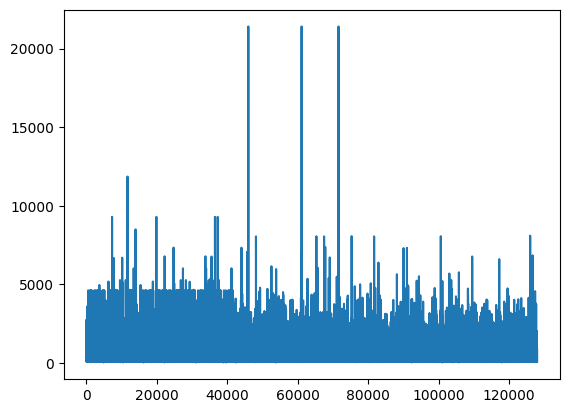

In [45]:
plt.plot(df_balanced.Length)
plt.show()

In [46]:
df_balanced.Length.max()

21409

In [47]:
df_balanced.describe()

,Score,label,Length
count,127920.000000,127920.0000,127920.000000
mean,3.059811,1.0000,474.289282
std,1.454822,0.8165,478.003095
min,1.000000,0.0000,32.000000
25%,2.000000,0.0000,195.000000
50%,3.000000,1.0000,334.000000
75%,5.000000,2.0000,579.000000
max,5.000000,2.0000,21409.000000


In [48]:
import matplotlib.pyplot as plt

In [49]:
import re
import pandas as pd

def remove_tags(text):
    return re.sub(r'<.*?>', '', text)

def preprocess_text(sen):
    # Removing HTML tags
    sentence = remove_tags(sen)

    # Removing all punctuations and numbers, keeping only alphabets
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Removing single characters (isolated letters)
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)

    # Replacing multiple spaces with a single space
    sentence = re.sub(r'\s+', ' ', sentence)

    # Stripping leading and trailing spaces
    sentence = sentence.strip()

    # Lowercase the sentence
    sentence = sentence.lower()

    return sentence

def text_preprocessing(df_balanced, col_name):
    # Apply the preprocessing function to the column without a progress bar
    df_balanced[col_name] = df_balanced[col_name].apply(preprocess_text)
    
    return df_balanced


In [50]:
df_cleaned = text_preprocessing(df_balanced, 'Text')

In [51]:
df_cleaned.head()

,Score,Text,label,Length
0,2,i have an absolute passion for deep dark hot c...,0,582
1,2,this drink is so super energy it almost fright...,0,244
2,2,i sticking with what used to be carnation now ...,0,119
3,1,aspertame causes alot of problems including pr...,0,615
4,2,i ordered these because my local pet store sto...,0,279


In [52]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127920 entries, 0 to 127919
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Score   127920 non-null  int64 
 1   Text    127920 non-null  object
 2   label   127920 non-null  int64 
 3   Length  127920 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.9+ MB


In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [54]:
num_words = 10000 # this means 10000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
tokenizer.fit_on_texts(df_cleaned['Text'])


In [55]:
len(tokenizer.word_index) # this is whole unique words in our corpus
# but we are taking only 10000 words in our model

62849

In [56]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

# Define features and target
X = df_cleaned['Text']  # Features (text data)
y = df_cleaned['label']  # Target (labels)

# First, split the data into training and temp sets (80% train, 20% temp for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Now split the temp set into validation and test sets (50% of temp for validation, 50% for test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)  # Convert training texts to sequences
X_val_seq = tokenizer.texts_to_sequences(X_val)      # Convert validation texts to sequences
X_test_seq = tokenizer.texts_to_sequences(X_test)    # Convert test texts to sequences

# Pad sequences
maxlen = 533  # Define the maximum length for padding
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post')  # Pad training sequences
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen, padding='post')      # Pad validation sequences
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post')    # Pad test sequences

# Convert labels to one-hot encoding
num_classes = 3  # Set this to the number of classes in your dataset (since you have 3 classes)
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)

# Now you have:
# X_train_pad, y_train_one_hot (for training)
# X_val_pad, y_val_one_hot (for validation)
# X_test_pad, y_test_one_hot (for testing)


In [57]:
print(X_train_pad.shape, X_val_pad.shape)

(102336, 533) (12792, 533)


In [58]:
import gensim.downloader as api

# Load 300-dimensional GloVe model from Gensim's data repository
glove_gensim = api.load('glove-wiki-gigaword-300') # 300 dimension


In [59]:
glove_gensim['cat'].shape[0]

300

In [60]:
import numpy as np

In [61]:
vector_size = 300
gensim_weight_matrix = np.zeros((num_words, vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words:  # since index starts with zero 
        if word in glove_gensim.key_to_index:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(300)

In [62]:
gensim_weight_matrix.shape

(10000, 300)

In [63]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, GRU
from tensorflow.keras.layers import Dropout

In [64]:
EMBEDDING_DIM = 300 # this means the embedding layer will create  a vector in 300 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100,return_sequences=False)))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [65]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.keras', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [66]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping: monitor validation loss
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# ModelCheckpoint: monitor validation loss (or accuracy, but should be consistent)
mc = ModelCheckpoint('./model.keras', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [67]:
history_embedding = model.fit(X_train_pad,y_train_one_hot, epochs = 25, batch_size = 120, validation_data=(X_val_pad, y_val_one_hot),verbose = 2, callbacks= [es, mc]  )

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.71451, saving model to ./model.keras
853/853 - 303s - 355ms/step - accuracy: 0.6168 - loss: 0.8258 - val_accuracy: 0.6840 - val_loss: 0.7145
Epoch 2/25

Epoch 2: val_loss improved from 0.71451 to 0.62464, saving model to ./model.keras
853/853 - 296s - 347ms/step - accuracy: 0.7027 - loss: 0.6744 - val_accuracy: 0.7301 - val_loss: 0.6246
Epoch 3/25

Epoch 3: val_loss improved from 0.62464 to 0.59035, saving model to ./model.keras
853/853 - 296s - 347ms/step - accuracy: 0.7397 - loss: 0.6034 - val_accuracy: 0.7434 - val_loss: 0.5903
Epoch 4/25

Epoch 4: val_loss improved from 0.59035 to 0.55392, saving model to ./model.keras
853/853 - 322s - 378ms/step - accuracy: 0.7658 - loss: 0.5531 - val_accuracy: 0.7663 - val_loss: 0.5539
Epoch 5/25

Epoch 5: val_loss improved from 0.55392 to 0.53216, saving model to ./model.keras
853/853 - 296s - 347ms/step - accuracy: 0.7871 - loss: 0.5088 - val_accuracy: 0.7778 - val_loss: 0.5322
Epoch 6/25

Ep

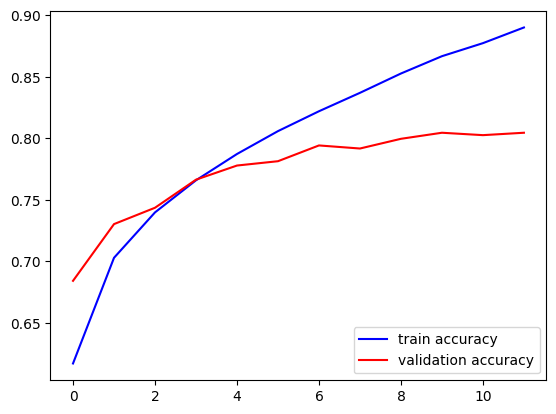

In [68]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [79]:
model.evaluate(X_test_pad, y_test_one_hot) 

400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - accuracy: 0.7994 - loss: 0.5606


[0.5395137667655945, 0.8086304068565369]

In [70]:
y_pred =   np.argmax(model.predict(X_test_pad), axis  =  1)

400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step


In [77]:
y_true = np.argmax(y_test_one_hot, axis = 1)


In [78]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4447
           1       0.73      0.76      0.74      4076
           2       0.87      0.86      0.87      4269

    accuracy                           0.81     12792
   macro avg       0.81      0.81      0.81     12792
weighted avg       0.81      0.81      0.81     12792

